<a href="https://colab.research.google.com/github/kritikagupta22/Data-Visualization/blob/main/Data_Visualization_Theory1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

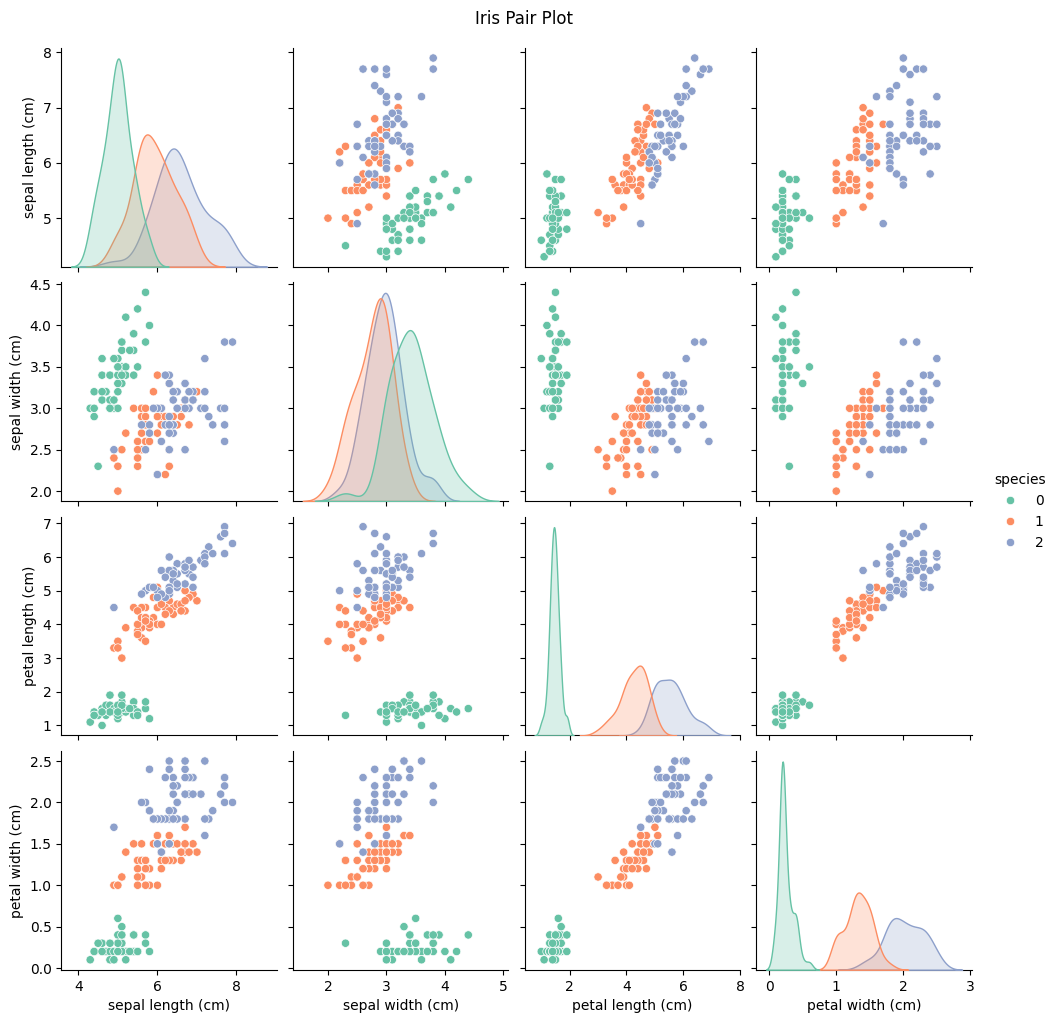


KNN Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



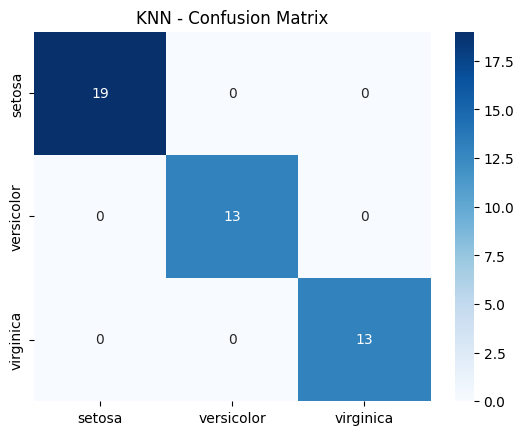


Top 5 Predictions:
    Actual  Predicted Actual_Name Predicted_Name
0       1          1  versicolor     versicolor
1       0          0      setosa         setosa
2       2          2   virginica      virginica
3       1          1  versicolor     versicolor
4       1          1  versicolor     versicolor

Bottom 5 Predictions:
     Actual  Predicted Actual_Name Predicted_Name
40       2          2   virginica      virginica
41       1          1  versicolor     versicolor
42       1          1  versicolor     versicolor
43       0          0      setosa         setosa
44       0          0      setosa         setosa

Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg     

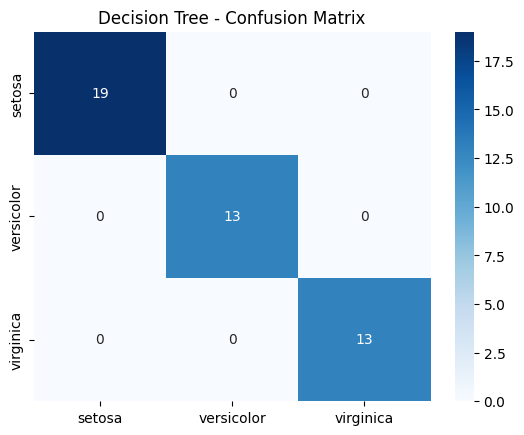


Top 5 Predictions:
    Actual  Predicted Actual_Name Predicted_Name
0       1          1  versicolor     versicolor
1       0          0      setosa         setosa
2       2          2   virginica      virginica
3       1          1  versicolor     versicolor
4       1          1  versicolor     versicolor

Bottom 5 Predictions:
     Actual  Predicted Actual_Name Predicted_Name
40       2          2   virginica      virginica
41       1          1  versicolor     versicolor
42       1          1  versicolor     versicolor
43       0          0      setosa         setosa
44       0          0      setosa         setosa

Logistic Regression Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted av

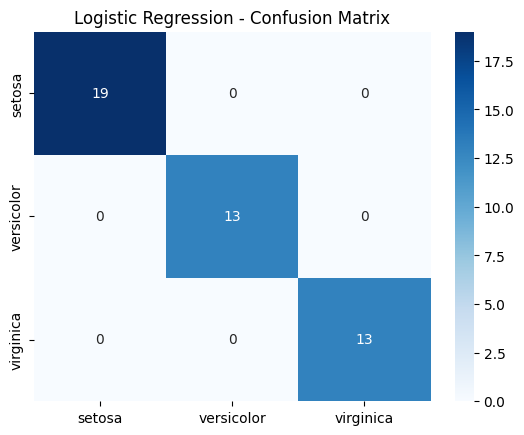


Top 5 Predictions:
    Actual  Predicted Actual_Name Predicted_Name
0       1          1  versicolor     versicolor
1       0          0      setosa         setosa
2       2          2   virginica      virginica
3       1          1  versicolor     versicolor
4       1          1  versicolor     versicolor

Bottom 5 Predictions:
     Actual  Predicted Actual_Name Predicted_Name
40       2          2   virginica      virginica
41       1          1  versicolor     versicolor
42       1          1  versicolor     versicolor
43       0          0      setosa         setosa
44       0          0      setosa         setosa


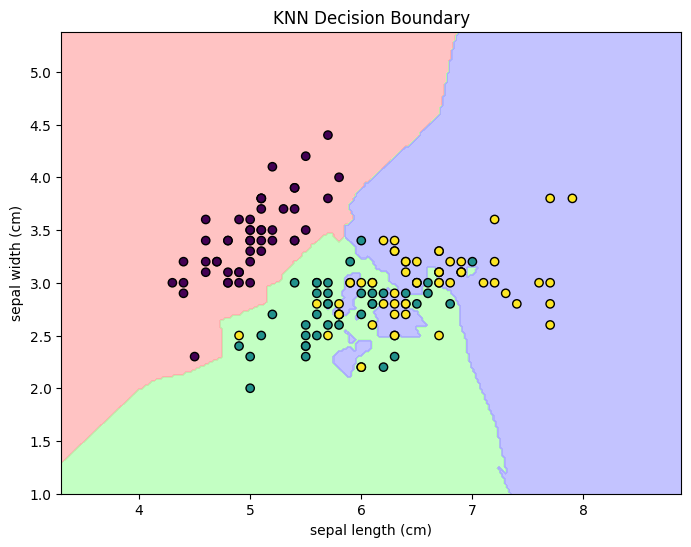

In [ ]:
# ===================== IRIS FLOWER CLASSIFICATION =====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
iris = load_iris()
X, y = iris.data, iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# EDA Visualization
sns.pairplot(df, hue="species", palette="Set2")
plt.suptitle("Iris Pair Plot", y=1.02)
plt.show()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Top 5 and Bottom 5 Predictions
    results_df = pd.DataFrame({
        "Actual": y_test,
        "Predicted": y_pred,
        "Actual_Name": [iris.target_names[i] for i in y_test],
        "Predicted_Name": [iris.target_names[i] for i in y_pred]
    })
    print("\nTop 5 Predictions:\n", results_df.head())
    print("\nBottom 5 Predictions:\n", results_df.tail())

# Decision Boundary for KNN
from matplotlib.colors import ListedColormap
X_plot = X[:, :2]  # Using first two features for 2D plot
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y, test_size=0.3, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_plot, y_train_plot)

# Meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.7)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Decision Boundary")
plt.show()


Saving spam.csv to spam.csv


/tmp/ipython-input-1114137316.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


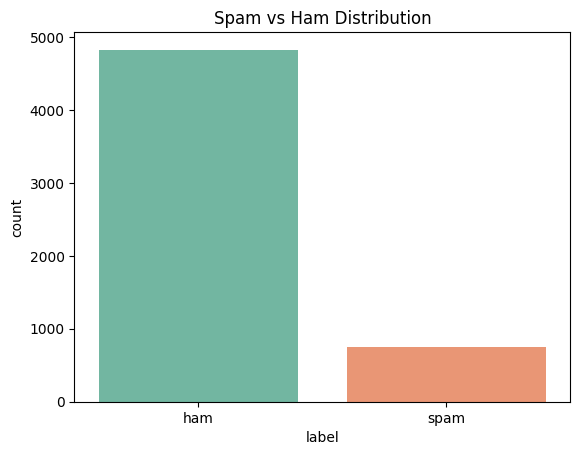

/tmp/ipython-input-1114137316.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=spam_df, palette="Reds_r")


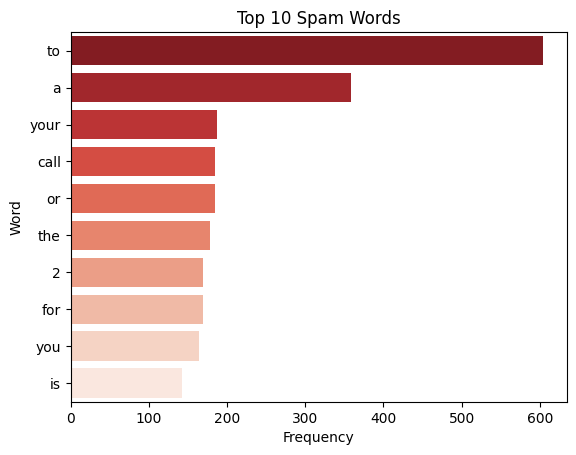


Accuracy: 0.9778708133971292

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



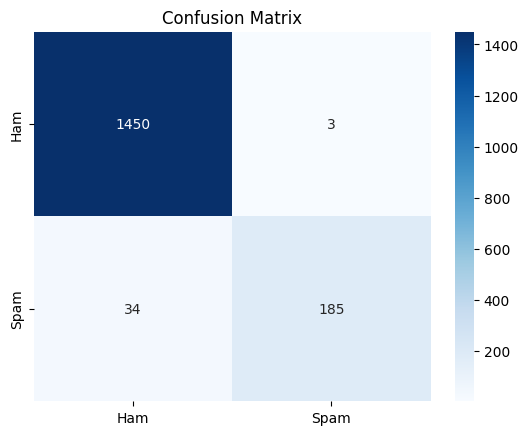


Top 5 Predictions:
                                                 Message  Actual  Predicted
3245  Funny fact Nobody teaches volcanoes 2 erupt, t...       0          0
944   I sent my scores to sophas and i had to do sec...       0          0
1044  We know someone who you know that fancies you....       1          1
2484  Only if you promise your getting out as SOON a...       0          0
812   Congratulations ur awarded either å£500 of CD ...       1          1

Bottom 5 Predictions:
                                                 Message  Actual  Predicted
2505               Congrats kano..whr s the treat maga?       0          0
2525  Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...       0          0
4975  You are gorgeous! keep those pix cumming :) th...       0          0
650   Thats cool! Sometimes slow and gentle. Sonetim...       0          0
4463       Ranjith cal drpd Deeraj and deepak 5min hold       0          0


In [ ]:
# ===================== EMAIL SPAM DETECTION (Upload CSV) =====================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- Upload CSV ----
from google.colab import files
uploaded = files.upload()

# Read uploaded file (replace 'spam.csv' with your actual filename if different)
df = pd.read_csv(list(uploaded.keys())[0], encoding='latin-1')

# Keep only relevant columns
df = df.rename(columns={"v1": "label", "v2": "message"})
df = df[["label", "message"]]

# Encode labels (ham=0, spam=1)
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

# ---- EDA: Spam vs Ham Count ----
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Spam vs Ham Distribution")
plt.show()

# ---- EDA: Top Spam Words ----
spam_words = " ".join(df[df["label"] == "spam"]["message"]).split()
spam_common = Counter(spam_words).most_common(10)
spam_df = pd.DataFrame(spam_common, columns=["Word", "Frequency"])
sns.barplot(x="Frequency", y="Word", data=spam_df, palette="Reds_r")
plt.title("Top 10 Spam Words")
plt.show()

# ---- Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(df["message"], df["label_num"], test_size=0.3, random_state=42)

# ---- Vectorization ----
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ---- Model ----
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# ---- Predictions ----
y_pred = model.predict(X_test_vec)

# ---- Accuracy & Report ----
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.show()

# ---- Top 5 and Bottom 5 Predictions ----
results_df = pd.DataFrame({
    "Message": X_test,
    "Actual": y_test,
    "Predicted": y_pred
})
print("\nTop 5 Predictions:\n", results_df.head())
print("\nBottom 5 Predictions:\n", results_df.tail())

